# Exploration and Analysis of Mental Health Data from Shamiri

### by F Njakai

### Table of contents
* [Introduction](#introduction)
* [Preliminary Wrangling](#preliminary-wrangling)
* [Exploration](#exploration)
* [Summary of Findings](#exploration)
* [Conclusions](#conclusions)

<div id="introduction"></div>

## Introduction

<div id="preliminary-wrangling"></div>

## Preliminary Wrangling

In [4]:
#install and/or upgrade packages

!pip install pandas seaborn pandas-profiling

Defaulting to user installation because normal site-packages is not writeable


In [45]:
#imports

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
from random import randint
from os import path
from contextlib import suppress
from pandas_profiling import ProfileReport
import re

%load_ext autoreload
%autoreload 2
%reload_ext autoreload


%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Default settings for plots

automate, as much as possible, the process of creating visualisations

##### why?
* it is efficient
* visualisations are consistent

##### how?
* create templates

In [3]:
#template no. 1

#default blue
default_blue = sns.color_palette('tab10')[0]

#default orange
default_orange = sns.color_palette('tab10')[1]

#default palette
default_palette = sns.color_palette('tab10')

In [2]:
#template no. 2

'''
Simple function to create `Figure` object
using matplotlib. Has an x-lab, y-lab and
title.

"Father Figure", if you like :)

3 params, all type `str`:
@x_lab: x label
@y_lab: y label
@title: title

return: None
'''

def create_fig(x_lab: str, y_lab: str, title: str):
    """Father Figure"""
    try:
        plt.figure(figsize=(10, 6.18), dpi=216, frameon=False, clear=True)
        plt.xlabel(x_lab)
        plt.ylabel(y_lab)
        plt.title(title)
    except ModuleNotFoundError:
        print(f'Please `import matplotlib.pyplot as plt` and try again')
    except:
        print(f'Failed to create template')
        raise

In [3]:
#template no. 3

'''
Simple function to create `Figure` object
using matplotlib for sub-plots.

"Father Figure", for sub-plots :)

2 params, type `int`; number of sub-plots:
@n_row: #rows
@n_col: #cols

return: fig and ax objects
'''

def create_sub(n_row: int=1, n_col: int=1):
    """Father Figure for  sub-plots"""
    try:
        fig, ax = plt.subplots(n_row, n_col, figsize=(10, 6.18), dpi=216)
        fig.tight_layout(pad=10.0)
        return fig, ax
    except ModuleNotFoundError:
        print(f'Please `import matplotlib.pyplot as plt` and try again')
    except:
        print(f'Failed to create template')
        raise

In [4]:
#confirm that a df exists

'''
Simple function to see if a df exists

1 param: name of variable holding the df

Do not pass the arg as a string. 
Repeat: DO NOT pass the arg as a string.

return: None
'''

def confirm_df_exists(df):
    """confirm that a df exists"""
    if not df.empty:
        print(f'This dataframe exists')
        return
    print(f'This dataframe does not exist')

In [5]:
#confirm that a file exists and/or has been
# created in current dir

'''
simple function to confirm that a file exists
and/or has been created in current dir

1 param, type `str`: name of file
@file_name: name of file

return None
'''

def confirm_file_exists(file_name: str):
    """confirm that file exists"""
    if path.exists(file_name):
        print(f'File exists')
    else:
        print(f'Something went wrong. Investigate')

In [34]:
#group data and find mean

'''
Function to calculate mean of
grouped data

Takes in 2 args: 
@var_1 -> variable to average by
@var_2 -> variable to access data by

Both args must be columns of a pandas DF

return: average  of grouped data
'''

def group_avg(var_1, var_2):
    """ function group_avg"""
    if var_1 and var_2:
        avg_gp_data = df.groupby(var_1)[var_2].mean()
        return avg_gp_data
    else:
        print(f'Check that both arguments are columns of a pandas DF and try again')





In [7]:
#group data and find sum

'''
Function to calculate sum of
grouped data

Takes in 2 args
@var_1 -> variable to sum by
@var_2 -> variable to access data by

Both args must be columns of a pandas DF

return: sum  of grouped data
'''

def group_sum(var_1, var_2):
    """ function group_sum"""
    if var_1 and var_2:
        sum_gp_data = df.groupby(var_1)[var_2].sum()
        return sum_gp_data
    else:
        print(f'Check that both arguments are columns of a pandas DF and try again')



In [8]:
#sorting ops

'''
function to create and sort a DF

3 params:
@x: pandas series #1
@y: pandas series #2
@ascending: bool, default T

return: pandas DF
'''
def custom_sort_df(x, y, ascending:bool=True):
    """function custom_sort_df"""
    try:
        dd = pd.DataFrame({k:v for (k, v) in zip(x, y)}, index=['Count']).transpose()
        dd.sort_values('Count', inplace=True, ascending=True)
        dd.reset_index(inplace=True)
        return dd
    except:
        print(f'Check that x and y are pandas series and try again')

In [28]:
'''
simple function to create a sum super set

1 param, type `str`:
@search_term: the term to search

return: pandas df
'''

def create_sum_super_set(search_term: str):
    """ create_sum_super_set"""
    li = [i for i in df.columns if i.startswith(search_term)]
    sum_dict = {}

    for i in range(len(li)):
        sum_grp = group_sum(li[i], li[i])
        li_di = dict(sum_grp)
        sum_dict[li[i]] = li_di
    df_sum_dict = pd.DataFrame(sum_dict)

    return df_sum_dict

In [35]:
'''
simple function to create an average super set

1 param, type `str`:
@search_term: the term to search

return: pandas df
'''

def create_average_super_set(search_term: str):
    """ create_average_super_set"""
    li = [i for i in df.columns if i.startswith(search_term)]
    avg_dict = {}

    for i in range(len(li)):
        avg_grp = group_avg(li[i], li[i])
        li_di = dict(avg_grp)
        avg_dict[li[i]] = li_di
    df_avg_dict = pd.DataFrame(avg_dict)

    return df_avg_dict

### Load the data

In [9]:
df = pd.read_csv('shamiri_imputed_dataset.csv', sep=',')
confirm_df_exists(df)

This dataframe exists


In [28]:
df.shape

(658, 33)

In [25]:
df.duplicated().value_counts()

False    658
dtype: int64

In [26]:
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ParticipantID     658 non-null    object 
 1   PHQ1              658 non-null    int64  
 2   PHQ2              658 non-null    int64  
 3   PHQ3              658 non-null    int64  
 4   PHQ4              658 non-null    int64  
 5   PHQ5              658 non-null    int64  
 6   PHQ6              658 non-null    int64  
 7   PHQ7              658 non-null    int64  
 8   PHQ8              658 non-null    int64  
 9   GAD1              658 non-null    int64  
 10  GAD2              658 non-null    int64  
 11  GAD3              658 non-null    int64  
 12  GAD4              658 non-null    int64  
 13  GAD5              658 non-null    int64  
 14  GAD6              658 non-null    int64  
 15  GAD7              658 non-null    int64  
 16  MSSS1             658 non-null    int64  
 1

In [31]:
df.ParticipantID.nunique()

626

In [27]:
df.sample(randint(5, 15))

,ParticipantID,PHQ1,PHQ2,PHQ3,PHQ4,PHQ5,PHQ6,PHQ7,PHQ8,GAD1,...,MSSS8,MSSS9,MSSS10,MSSS11,MSSS12,Tribe,Gender,School,Age,School_Resources
137,EH_058,0,1,0,0,0,2,0,2,0,...,7,4,6,7,4,Minority,F,Elite,17.0,Poor
572,OLY_127,1,0,0,1,2,0,2,0,2,...,2,3,2,3,3,Minority,F,Olympic,14.0,Medium
470,OLY_025,1,1,2,1,0,1,0,0,0,...,2,1,5,6,5,Minority,M,Olympic,14.0,Medium
430,AGHS_142,2,1,1,2,0,1,1,3,1,...,4,6,6,4,5,Majority,F,AGHS,15.0,Rich
520,OLY_075,1,0,0,3,0,0,2,0,0,...,7,7,7,7,7,Minority,F,Olympic,16.0,Medium
620,OLY_175,2,3,1,0,1,1,1,1,0,...,6,6,6,6,6,Minority,M,Olympic,17.0,Medium
271,AHS_115,3,0,0,3,1,1,3,3,2,...,1,5,3,1,4,Majority,M,AHS,17.0,Rich
120,EH_041,2,2,2,2,2,3,2,2,2,...,6,3,7,4,2,Minority,M,Elite,16.0,Poor


### Structure

#### General
* 658 observations
* 33 variables
    * 27 of type `int`
    * 1 of type `float`
    * 5 of type `str`

#### Missing and null values
* `df` has no missing or null values

#### Duplicated observations
* `df` has no duplicated observations

#### Multiple values for a variable
* observations in twtr_archive have a single value per variable

### Quality
* no missing values
* values follow the [definition of variables](./variables.md)

### Tidiness
* variables are properly defined
* each variable represents one piece of information
* observations in twtr_archive have a single value per variable

#### Cleaning operation is not needed


<div id="explration"></div>

## Exploration

#### Research Question 1
* What are the `PHQ-8` scores?
    * what is the score of the whole sample?
    * what is the score between tribes?
    * what is the score among males?
    * what is the score among females?
    * what is the score among schools?
    * what is the score among age groups?
    * what is the score among school resource groups?

In [29]:

sum_phq = create_sum_super_set('PHQ')
sum_phq

,PHQ1,PHQ2,PHQ3,PHQ4,PHQ5,PHQ6,PHQ7,PHQ8
0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,251.0,207.0,163,234.0,157.0,194.0,231.0,153.0
2,198.0,204.0,192,252.0,136.0,154.0,190.0,150.0
3,426.0,390.0,396,270.0,321.0,492.0,507.0,195.0
4,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN


In [64]:
avg_phq = create_average_super_set('PHQ')
avg_phq

,PHQ1,PHQ2,PHQ3,PHQ4,PHQ5,PHQ6,PHQ7,PHQ8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN


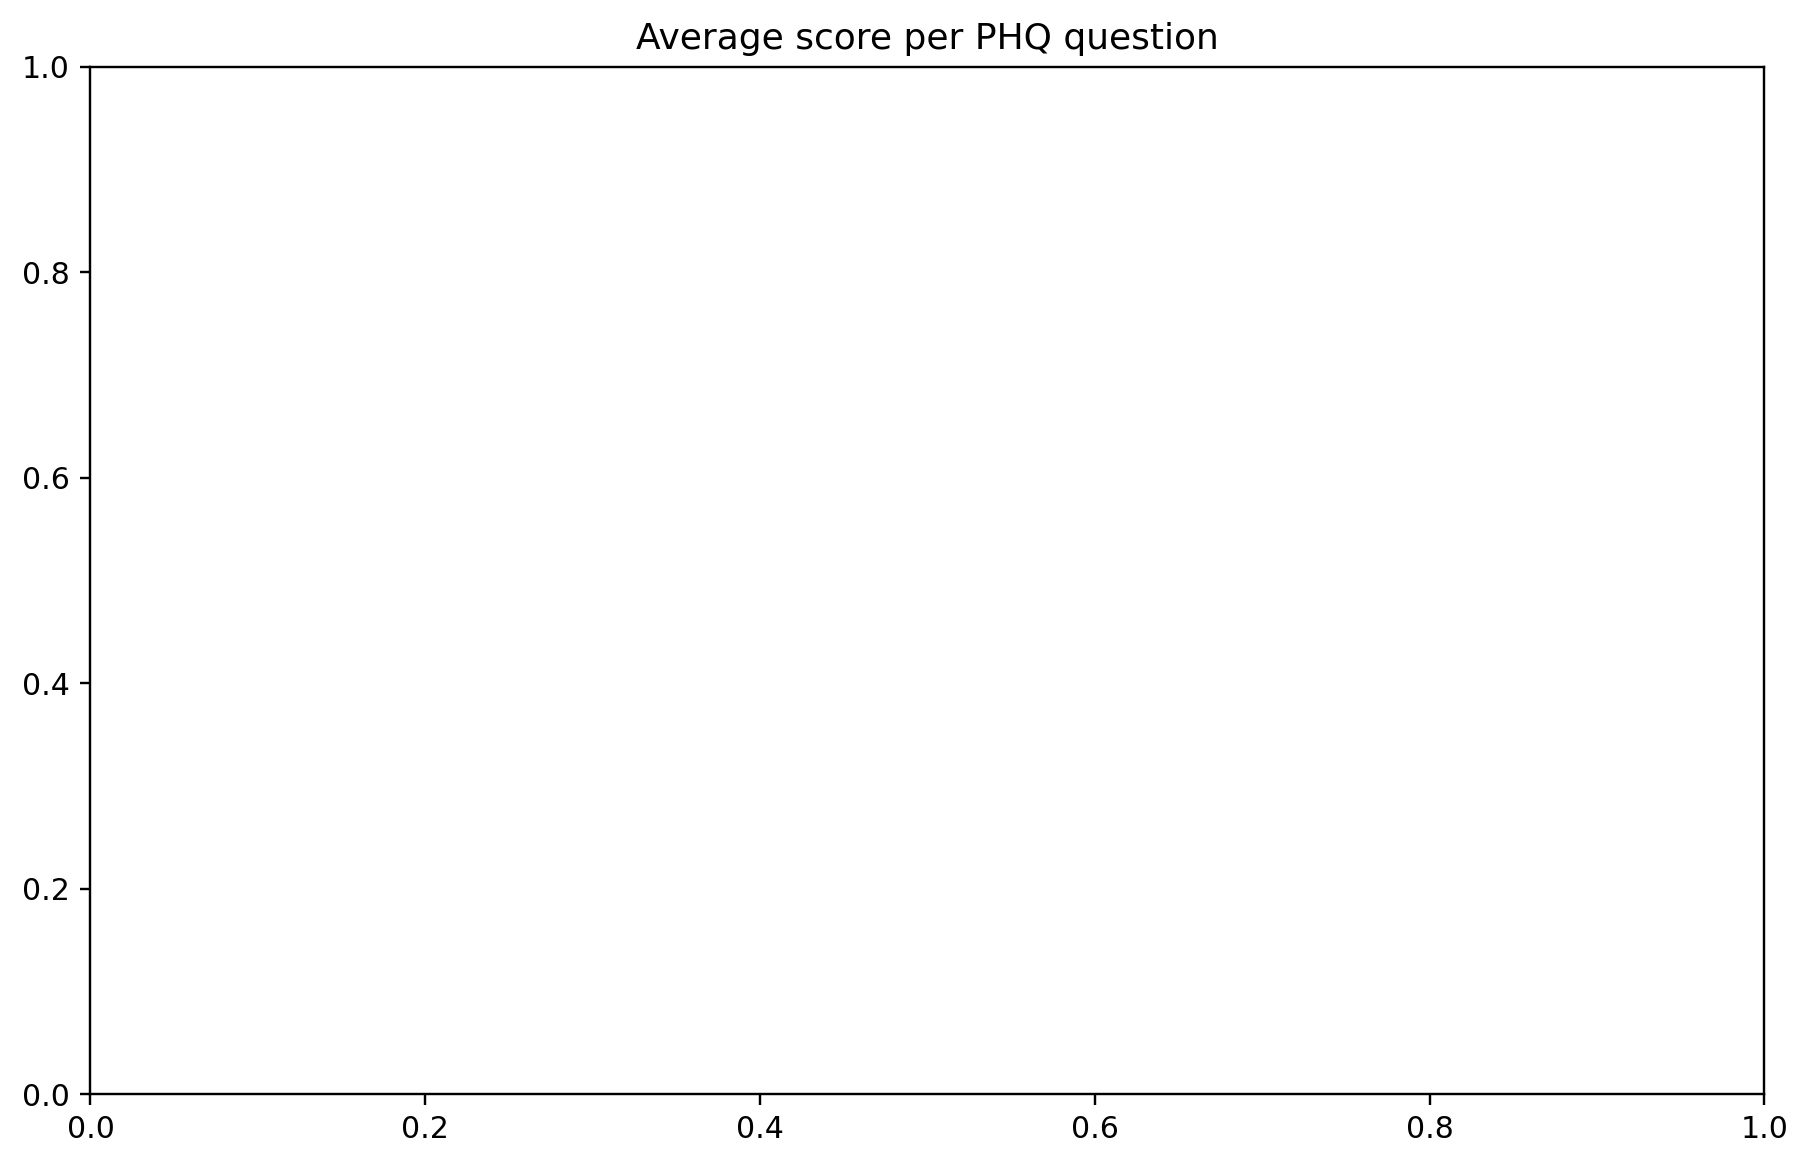

In [53]:
create_fig('', '','Average score per PHQ question')


In [54]:
profile = ProfileReport(avg_phq)
profile.to_file(output_file='avg_phq_report.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 245.41it/s]


In [80]:


# for i in range(len(df)):

def icreate_average_super_set(var_1: str, var_2: str):
    """ create_average_super_set"""
    li = [i for i in df.columns if i.startswith(var_2)]
    


    avg_dict = {}

    for i in range(len(li)):
        avg_grp = group_avg(var_1, li[i])
        li_di = dict(avg_grp)
        avg_dict[li[i]] = li_di
    df_avg_dict = pd.DataFrame(avg_dict)

    return df_avg_dict

aa = icreate_average_super_set('School', 'PHQ')
aa


,PHQ1,PHQ2,PHQ3,PHQ4,PHQ5,PHQ6,PHQ7,PHQ8
AGHS,1.318471,1.286624,1.343949,1.146497,1.089172,1.331210,1.369427,0.611465
AHS,1.163934,0.877049,1.303279,0.942623,1.032787,1.196721,1.540984,0.688525
Elite,1.448276,1.482759,1.022989,1.183908,0.954023,1.448276,1.528736,0.850575
Olympic,1.334906,1.254717,1.080189,1.202830,0.834906,1.216981,1.316038,0.816038
Starays,1.462500,1.212500,0.887500,1.287500,0.712500,1.262500,1.412500,0.887500


#### Research Question 2
* What are the `GAD-7` scores?
    * what is the score of the whole sample?
    * what is the score between tribes?
    * what is the score among males?
    * what is the score among females?
    * what is the score among schools?
    * what is the score among age groups?
    * what is the score among school resource groups?

In [32]:
sum_gad = create_sum_super_set('GAD')
sum_gad

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7
0,0,0,0,0,0,0,0
1,239,198,213,176,141,237,186
2,196,202,208,148,190,150,206
3,255,468,576,333,180,405,435


In [37]:
avg_gad = create_average_super_set('GAD')
avg_gad

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,3.0,3.0,3.0,3.0,3.0,3.0,3.0


#### Research Question 3
* What are the `MPSS-12` scores?
    * what is the score of the whole sample?
    * what is the score between tribes?
    * what is the score among males?
    * what is the score among females?
    * what is the score among schools?
    * what is the score among age groups?
    * what is the score among school resource groups?

In [33]:
sum_mpss = create_sum_super_set('MSSS')
sum_mpss

,MSSS1,MSSS2,MSSS3,MSSS4,MSSS5,MSSS6,MSSS7,MSSS8,MSSS9,MSSS10,MSSS11,MSSS12
1,40.0,48.0,23.0,39.0,41.0,54.0,71.0,63.0,49.0,48,31.0,79.0
2,110.0,106.0,50.0,88.0,90.0,104.0,190.0,122.0,106.0,118,68.0,164.0
3,123.0,93.0,72.0,102.0,90.0,174.0,153.0,102.0,141.0,117,105.0,192.0
4,204.0,176.0,132.0,184.0,260.0,400.0,348.0,260.0,260.0,224,224.0,336.0
5,535.0,470.0,250.0,530.0,410.0,795.0,710.0,550.0,690.0,405,410.0,775.0
6,1146.0,1254.0,1218.0,1050.0,1056.0,1044.0,876.0,966.0,1164.0,882,1152.0,816.0
7,1211.0,1253.0,2100.0,1498.0,1533.0,427.0,462.0,1148.0,784.0,1589,1596.0,406.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN


In [38]:
avg_mpss = create_average_super_set('MSSS')
avg_mpss

,MSSS1,MSSS2,MSSS3,MSSS4,MSSS5,MSSS6,MSSS7,MSSS8,MSSS9,MSSS10,MSSS11,MSSS12
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
5,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
6,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
7,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN


#### Research Question 4
* Does scoring high on one test imply a high score on the other?

In [ ]:
profile = ProfileReport(df)
profile.to_file(output_file='report.html')

<div id="summary-of-findings"></div>

## Summary of Findings

<div id="conclusions"></div>

## Conclusions